# Data Analysis and Visualizations about Covied-19
**BY: Ahmed Fouad**
<hr>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pycountry_convert as pc
import plotly.express as px
import datetime
sns.set(style='darkgrid')

import warnings
warnings.filterwarnings('ignore')

In [2]:
# read files

df_confirmed = pd.read_csv("confirmed_global.csv")

df_death = pd.read_csv("deaths_global.csv")

df_country = pd.read_csv("cases_country.csv")

df_cases_time = pd.read_csv("cases_time.csv")

In [3]:
df_confirmed.head(2)

Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  3/28/21  3/29/21  3/30/21  \
0        0        0        0        0  ...    56294    56322    56384   
1        0        0        0        0  ...   124134   124419   124723   

   3/31/21  4/1/21  4/2/21  4/3/21  4/4/21  4/5/21  4/6/21  
0    56454   56517   56572   56595   56676   56717   56779  
1   125157  125506  125842  126183  126531  126795  126936  

[2 rows x 445 columns]

In [4]:
df_death.head(2)

Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  3/28/21  3/29/21  3/30/21  \
0        0        0        0        0  ...     2470     2472     2476   
1        0        0        0        0  ...     2210     2216     2227   

   3/31/21  4/1/21  4/2/21  4/3/21  4/4/21  4/5/21  4/6/21  
0     2484    2489    2495    2496    2497    2508    2512  
1     2235    2241    2247    2256    2265    2274    2283  

[2 rows x 445 columns]

In [5]:
df_country.head(2)

Country_Region          Last_Update       Lat      Long_  Confirmed  Deaths  \
0    Afghanistan  2021-04-07 12:20:55  33.93911  67.709953    56873.0  2512.0   
1        Albania  2021-04-07 12:20:55  41.15330  20.168300   126936.0  2283.0   

   Recovered   Active  Incident_Rate  People_Tested  People_Hospitalized  \
0    51940.0   2421.0     146.096645            NaN                  NaN   
1    95035.0  29618.0    4410.869414            NaN                  NaN   

   Mortality_Rate  UID ISO3  
0        4.416859    4  AFG  
1        1.798544    8  ALB

In [6]:
df_cases_time.head(2)

Country_Region Last_Update  Confirmed  Deaths  Recovered  Active  \
0    Afghanistan     1/22/20          0       0        NaN     NaN   
1    Afghanistan     1/23/20          0       0        NaN     NaN   

   Delta_Confirmed  Delta_Recovered  Incident_Rate  People_Tested  \
0              0.0              NaN            0.0            NaN   
1              0.0              NaN            0.0            NaN   

   People_Hospitalized Province_State  FIPS  UID iso3 Report_Date_String  \
0                  NaN            NaN   NaN    4  AFG         2020/01/22   
1                  NaN            NaN   NaN    4  AFG         2020/01/23   

   Delta_Deaths  
0           0.0  
1           0.0

## Preprocessing
<hr>

**1 -rename this columns:**
>**"Province/State":"state","Country/Region": "country"**
**"Country_Region": "country"**

**2 -Edit Active column to = confiremed - death - Recoverd.**

**3 -rename this countryes:**
>{'US':'USA', 'Korea, South':'South Korea', 'Taiwan*':'Taiwan', 'Congo (Kinshasa)':'Democratic Republic of the Congo', 'Cote d'Ivoire':'Côte d'Ivoire', 'Reunion':'Réunion', 'Congo (Brazzaville)':'Republic of the Congo', 'Bahamas, The':'Bahamas', 'Gambia, The':'Gambia'} in ['country':'Country_Region']

In [7]:
# rename this columns
df_confirmed = df_confirmed.rename({"Province/State":"state","Country/Region": "country"}, axis=1)
df_death     = df_death.rename({"Province/State":"state","Country/Region": "country"}, axis=1)
df_country   = df_country.rename({'Country_Region':'country'}, axis=1)
df_cases_time= df_country.rename({'Country_Region':'country'}, axis=1)

In [8]:
print(df_confirmed.columns[:4])
print(df_death.columns[:4])
print(df_country.columns[:4])
print(df_cases_time.columns[:4])

Index(['state', 'country', 'Lat', 'Long'], dtype='object')
Index(['state', 'country', 'Lat', 'Long'], dtype='object')
Index(['country', 'Last_Update', 'Lat', 'Long_'], dtype='object')
Index(['country', 'Last_Update', 'Lat', 'Long_'], dtype='object')


In [9]:
# Edit Active column to = confiremed - death - Recoverd
df_country['Active'] = df_country['Confirmed'] - df_country['Deaths'] - df_country['Recovered']
df_cases_time['Active'] = df_cases_time['Confirmed'] - df_cases_time['Deaths'] - df_cases_time['Recovered']

In [10]:
df_cases_time['Active'].head()

0     2421.0
1    29618.0
2    32671.0
3      641.0
4      849.0
Name: Active, dtype: float64

In [11]:
edite_countries = {'US':'USA', 
                   'Korea, South':'South Korea',
                   'Taiwan*':'Taiwan',
                   'Congo (Kinshasa)':'Democratic Republic of the Congo',
                   'Cote d\'Ivoire':'Côte d\'Ivoire',
                   'Reunion':'Réunion',
                   'Congo (Brazzaville)':'Republic of the Congo',
                   'Bahamas, The':'Bahamas',
                   'Gambia, The':'Gambia',
                   'Burma':'Myanmar',
                   'Diamond Princess':'USA'}

In [12]:
for i in edite_countries:
    df_confirmed.loc[df_confirmed['country'] == i,'country' ] = edite_countries[i]
    df_death.loc[df_death['country'] == i,'country' ] = edite_countries[i]
    df_country.loc[df_country['country'] == i,'country' ] = edite_countries[i]
    df_cases_time.loc[df_cases_time['country'] == i,'country' ] = edite_countries[i]

## Add name of continent
<hr>

In [13]:
continents = {
    'NA': 'North America',
    'SA': 'South America', 
    'AS': 'Asia',
    'OC': 'Australia',
    'AF': 'Africa',
    'EU' : 'Europe',
    'na' : 'Others'
}

In [14]:
def country_to_continent_code(country):
    try:
        return pc.country_alpha2_to_continent_code( pc.country_name_to_country_alpha2(country, cn_name_format="default") )
    except:
        return 'na'

In [15]:
df_s = {
    'df_confirmed' : df_confirmed,
    'df_death'     : df_death,
    'df_country'   : df_country,
    'df_cases_time':df_cases_time
}

for i in df_s:
    country = df_s[i]['country']
    country_code = [country_to_continent_code(x) for x in country]
    continent_name = [ continents[ country_code[x]]for x in range(len(country_code))    ]
    df_s[i].insert(2, 'continen', continent_name)
    

In [16]:
df_confirmed.head(2)

state      country continen       Lat       Long  1/22/20  1/23/20  1/24/20  \
0   NaN  Afghanistan     Asia  33.93911  67.709953        0        0        0   
1   NaN      Albania   Europe  41.15330  20.168300        0        0        0   

   1/25/20  1/26/20  ...  3/28/21  3/29/21  3/30/21  3/31/21  4/1/21  4/2/21  \
0        0        0  ...    56294    56322    56384    56454   56517   56572   
1        0        0  ...   124134   124419   124723   125157  125506  125842   

   4/3/21  4/4/21  4/5/21  4/6/21  
0   56595   56676   56717   56779  
1  126183  126531  126795  126936  

[2 rows x 446 columns]

In [17]:
df_death.head(2)

state      country continen       Lat       Long  1/22/20  1/23/20  1/24/20  \
0   NaN  Afghanistan     Asia  33.93911  67.709953        0        0        0   
1   NaN      Albania   Europe  41.15330  20.168300        0        0        0   

   1/25/20  1/26/20  ...  3/28/21  3/29/21  3/30/21  3/31/21  4/1/21  4/2/21  \
0        0        0  ...     2470     2472     2476     2484    2489    2495   
1        0        0  ...     2210     2216     2227     2235    2241    2247   

   4/3/21  4/4/21  4/5/21  4/6/21  
0    2496    2497    2508    2512  
1    2256    2265    2274    2283  

[2 rows x 446 columns]

In [18]:
df_country.head(2)

country          Last_Update continen       Lat      Long_  Confirmed  \
0  Afghanistan  2021-04-07 12:20:55     Asia  33.93911  67.709953    56873.0   
1      Albania  2021-04-07 12:20:55   Europe  41.15330  20.168300   126936.0   

   Deaths  Recovered   Active  Incident_Rate  People_Tested  \
0  2512.0    51940.0   2421.0     146.096645            NaN   
1  2283.0    95035.0  29618.0    4410.869414            NaN   

   People_Hospitalized  Mortality_Rate  UID ISO3  
0                  NaN        4.416859    4  AFG  
1                  NaN        1.798544    8  ALB

In [20]:
df_cases_time.head(2)

country          Last_Update continen       Lat      Long_  Confirmed  \
0  Afghanistan  2021-04-07 12:20:55     Asia  33.93911  67.709953    56873.0   
1      Albania  2021-04-07 12:20:55   Europe  41.15330  20.168300   126936.0   

   Deaths  Recovered   Active  Incident_Rate  People_Tested  \
0  2512.0    51940.0   2421.0     146.096645            NaN   
1  2283.0    95035.0  29618.0    4410.869414            NaN   

   People_Hospitalized  Mortality_Rate  UID ISO3  
0                  NaN        4.416859    4  AFG  
1                  NaN        1.798544    8  ALB

## Genral Analysis
<hr>

### Total of confirmeded cases, deaths, recovered, Active, incident rate and mortality rate in each country.

In [19]:
df_country[['country','Confirmed','Deaths','Recovered','Active','Incident_Rate','Mortality_Rate']].groupby('country').sum()\
                    .sort_values('Confirmed', ascending= False)\
                    .style.background_gradient(cmap='Blues',subset=["Confirmed"])\
                        .background_gradient(cmap='Reds',subset=["Deaths"])\
                        .background_gradient(cmap='Greens',subset=["Recovered"])\
                        .background_gradient(cmap='Purples',subset=["Active"])\
                        .background_gradient(cmap='Pastel1_r',subset=["Incident_Rate"])\
                        .background_gradient(cmap='YlOrBr',subset=["Mortality_Rate"])\
                        .format("{:.2f}")\
                        .format("{:.0f}",subset=["Confirmed","Deaths","Recovered","Active"])

<hr>

### Total of confirmeded cases, deaths, recovered and Active in each continen.

In [20]:
df_country[['continen','Confirmed','Deaths','Recovered','Active','Incident_Rate','Mortality_Rate']].groupby('continen').sum()\
                    .sort_values('Confirmed', ascending= False)\
                    .style.background_gradient(cmap='Blues',subset=["Confirmed"])\
                        .background_gradient(cmap='Reds',subset=["Deaths"])\
                        .background_gradient(cmap='Greens',subset=["Recovered"])\
                        .background_gradient(cmap='Purples',subset=["Active"])\
                        .background_gradient(cmap='Pastel1_r',subset=["Incident_Rate"])\
                        .background_gradient(cmap='YlOrBr',subset=["Mortality_Rate"])\
                        .format("{:.2f}")\
                        .format("{:.0f}",subset=["Confirmed","Deaths","Recovered","Active"])

<hr>

### Total of confirmeded cases, deaths, recovered and Active in the All world.

In [21]:
df_t = pd.DataFrame(df_country[['Confirmed','Deaths','Recovered','Active','Incident_Rate','Mortality_Rate']].sum()).transpose()
df_t.style.background_gradient(cmap='Blues',axis=1,subset=["Confirmed","Deaths","Recovered","Active",'Incident_Rate','Mortality_Rate'])
df_t

Confirmed     Deaths   Recovered      Active  Incident_Rate  \
0  132557605.0  2876192.0  75301789.0  21758336.0  526086.566604   

   Mortality_Rate  
0      392.633727

<hr>

# Genral visualization

### Top 10 countries (Confirmed Cases and Deaths)

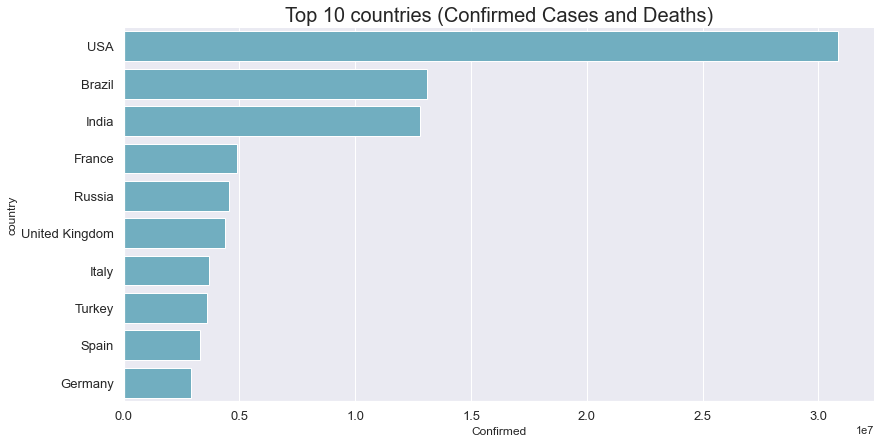

In [22]:
top_confirmed = df_country[['country','Confirmed']].sort_values('Confirmed', ascending=False).iloc[:10]

sns.catplot(x="Confirmed", y="country", color="c" , kind="bar", data=top_confirmed, height=6, aspect=2,)
plt.title("Top 10 countries (Confirmed Cases and Deaths)" ,fontsize=20)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()

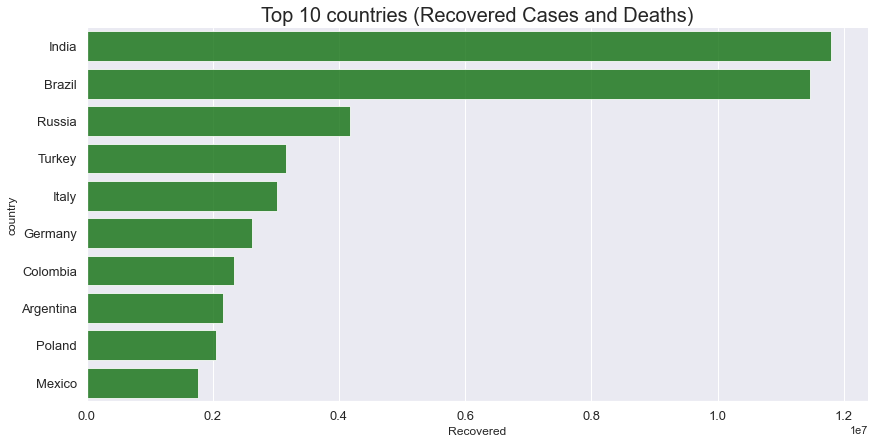

In [23]:
top_confirmed = df_country[['country','Recovered']].sort_values('Recovered', ascending=False).iloc[:10]

sns.catplot(x="Recovered", y="country", color="green", alpha=.8 , kind="bar", data=top_confirmed, height=6, aspect=2,)
plt.title("Top 10 countries (Recovered Cases and Deaths)" ,fontsize=20)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()

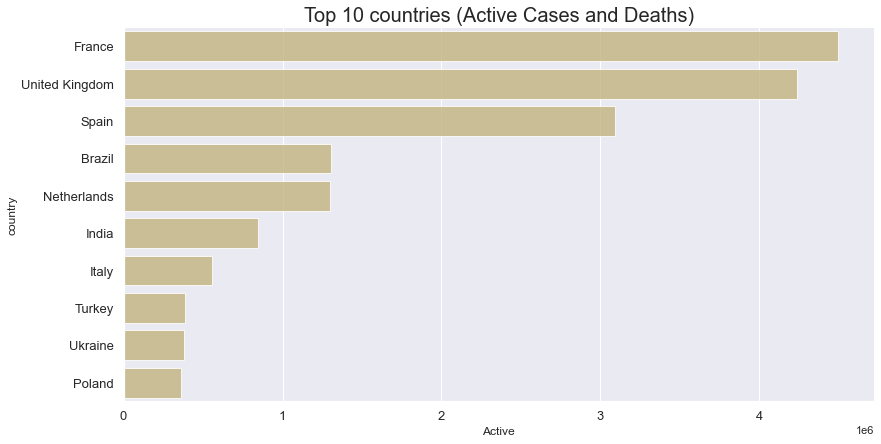

In [24]:
top_confirmed = df_country[['country','Active']].sort_values('Active', ascending=False).iloc[:10]

sns.catplot(x="Active", y="country", color="y", alpha=.8 , kind="bar", data=top_confirmed, height=6, aspect=2,)
plt.title("Top 10 countries (Active Cases and Deaths)" ,fontsize=20)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()

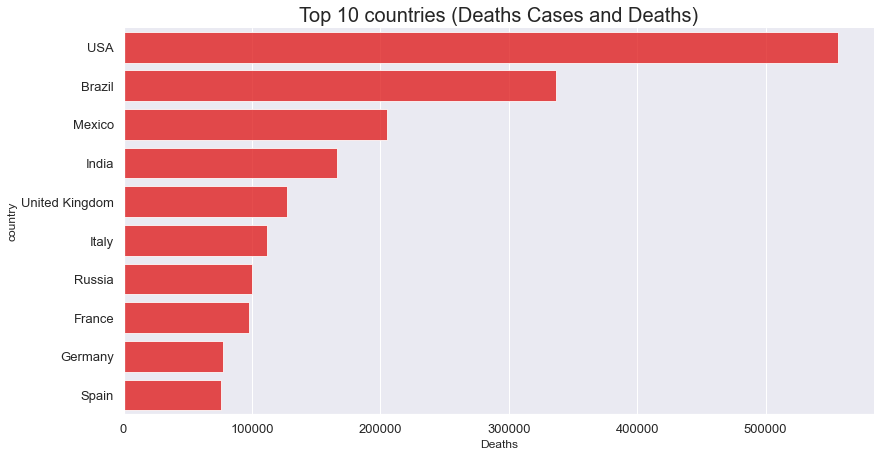

In [25]:
top_confirmed = df_country[['country','Deaths']].sort_values('Deaths', ascending=False).iloc[:10]

sns.catplot(x="Deaths", y="country", color="red", alpha=.8, kind="bar", data=top_confirmed, height=6, aspect=2,)
plt.title("Top 10 countries (Deaths Cases and Deaths)" ,fontsize=20)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()

<hr>

#  Visualization on Map

In [26]:
fig = px.choropleth(df_country, locations="country",
                    color=np.log10(df_country["Confirmed"]), # lifeExp is a column of gapminder
                    hover_name="country", # column to add to hover information
                    hover_data=["Confirmed"],
                    color_continuous_scale=px.colors.sequential.Plasma,
                    locationmode="country names"
                   )

fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(title_text="Confirmed Cases Heat Map (Log Scale)")
fig.update_coloraxes(colorbar_title="Confirmed Cases(Log Scale)", colorscale="Blues")

In [27]:
fig = px.choropleth(df_country, locations="country",
                    color=np.log10(df_country["Recovered"]), # lifeExp is a column of gapminder
                    hover_name="country", # column to add to hover information
                    hover_data=["Recovered"],
                    color_continuous_scale=px.colors.sequential.Plasma,
                    locationmode="country names"
                   )

fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(title_text="Recovered Cases Heat Map (Log Scale)")
fig.update_coloraxes(colorbar_title="Recovered Cases(Log Scale)", colorscale="greens")

In [28]:
fig = px.choropleth(df_country, locations="country",
                    color=np.log10(df_country["Active"]), # lifeExp is a column of gapminder
                    hover_name="country", # column to add to hover information
                    hover_data=["Active"],
                    color_continuous_scale=px.colors.sequential.Plasma,
                    locationmode="country names"
                   )

fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(title_text="Active Cases Heat Map (Log Scale)")
fig.update_coloraxes(colorbar_title="Active Cases(Log Scale)", colorscale="oranges")

In [29]:
fig = px.choropleth(df_country, locations="country",
                    color=np.log10(df_country["Deaths"]), # lifeExp is a column of gapminder
                    hover_name="country", # column to add to hover information
                    hover_data=["Deaths"],
                    color_continuous_scale=px.colors.sequential.Plasma,
                    locationmode="country names"
                   )

fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(title_text="Deaths Cases Heat Map (Log Scale)")
fig.update_coloraxes(colorbar_title="Deaths Cases(Log Scale)", colorscale="reds")

In [30]:
df_Africa_confirmed = df_country[ df_country['continen']=='Africa'][['Confirmed','country']].sort_values("Confirmed",ascending=False)
df_Africa_Deaths = df_country[ df_country['continen']=='Africa'][['Deaths','country']].sort_values("Deaths",ascending=False)

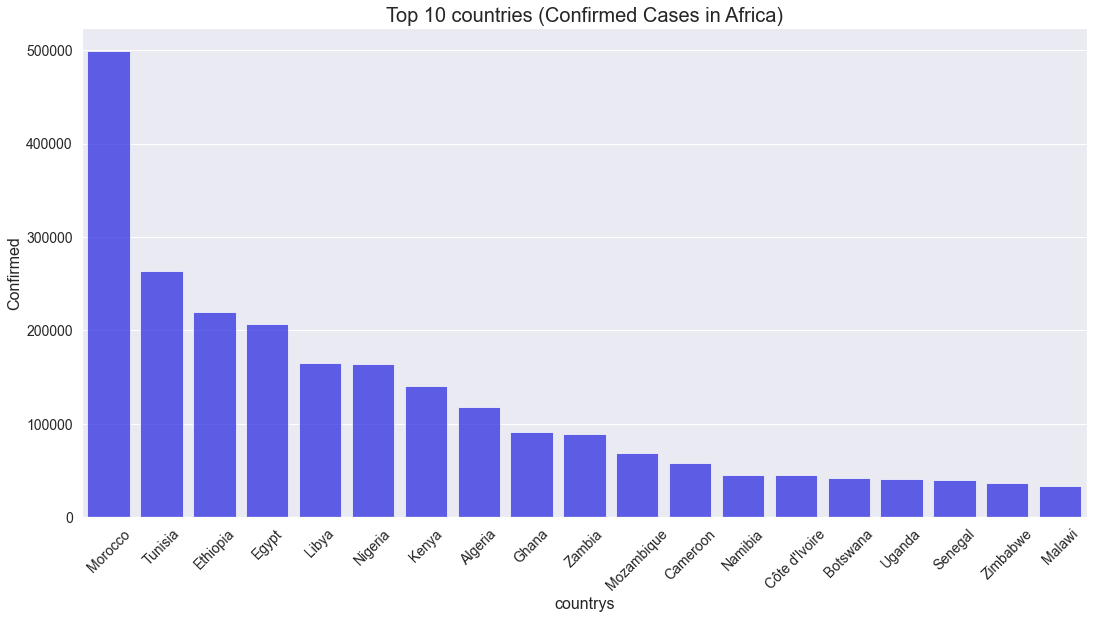

In [31]:
# Horizontal Bar plot
plt.figure(figsize=(18,9))

# sns.set(rc={"axes.facecolor":"#283747", "axes.grid":False,'xtick.labelsize':14,'ytick.labelsize':14})

sns.barplot(df_Africa_confirmed['country'][1:20], df_Africa_confirmed['Confirmed'][1:20], color='blue', alpha=.7)

plt.title("Top 10 countries (Confirmed Cases in Africa)" ,fontsize=20)

plt.xlabel('countrys',fontsize=16)
plt.ylabel('Confirmed',fontsize=16)
plt.xticks(fontsize=14,rotation= 45)
plt.yticks(fontsize=14)
plt.show()

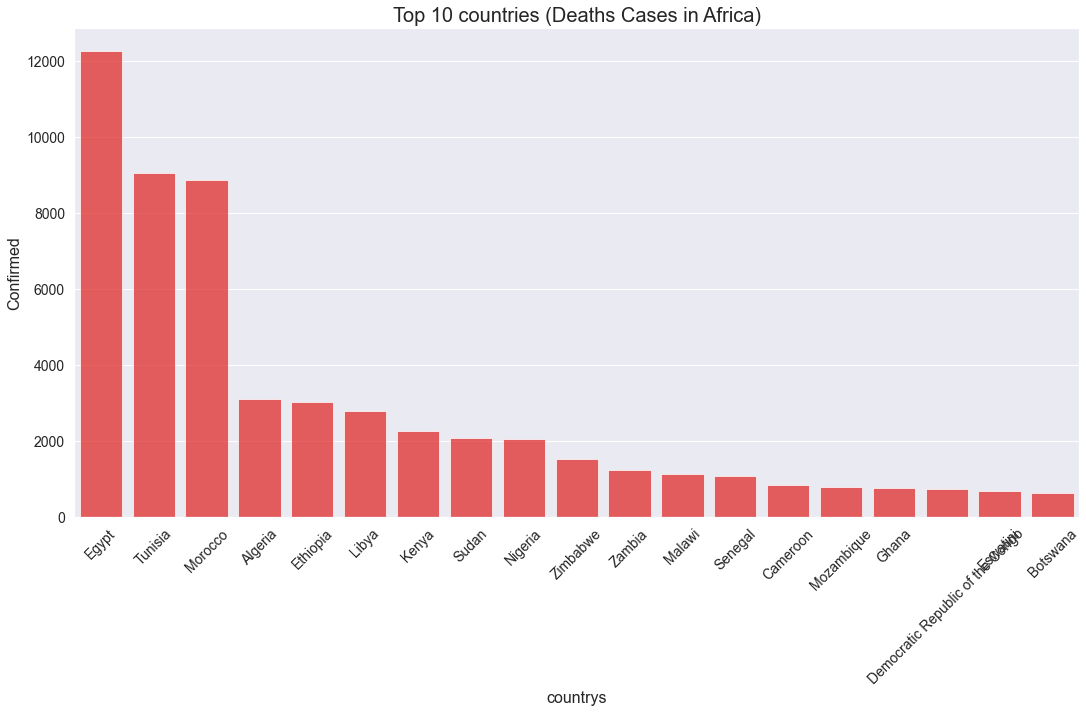

In [32]:
# Horizontal Bar plot
plt.figure(figsize=(18,9))

# sns.set(rc={"axes.facecolor":"#283747", "axes.grid":False,'xtick.labelsize':14,'ytick.labelsize':14})

sns.barplot(df_Africa_Deaths['country'][1:20], df_Africa_Deaths['Deaths'][1:20], color='red', alpha=.7)

plt.title("Top 10 countries (Deaths Cases in Africa)" ,fontsize=20)

plt.xlabel('countrys',fontsize=16)
plt.ylabel('Confirmed',fontsize=16)
plt.xticks(fontsize=14,rotation= 45)
plt.yticks(fontsize=14)
plt.show()

In [33]:
df_USA_confirmed = df_country[ df_country['continen']=='North America'][['Confirmed','country']].sort_values("Confirmed",ascending=False)
df_USA_Deaths = df_country[ df_country['continen']=='North America'][['Deaths','country']].sort_values("Deaths",ascending=False)

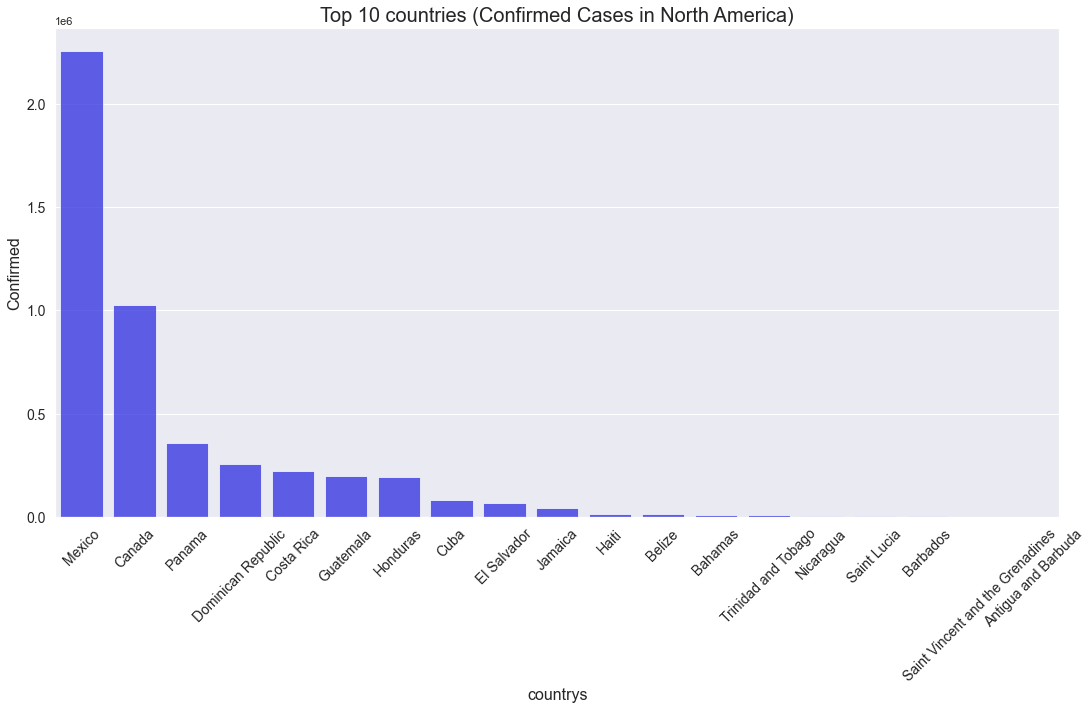

In [34]:
# Horizontal Bar plot
plt.figure(figsize=(18,9))

# sns.set(rc={"axes.facecolor":"#283747", "axes.grid":False,'xtick.labelsize':14,'ytick.labelsize':14})

sns.barplot(df_USA_confirmed['country'][1:20], df_USA_confirmed['Confirmed'][1:20], color='blue', alpha=.7)

plt.title("Top 10 countries (Confirmed Cases in North America)" ,fontsize=20)

plt.xlabel('countrys',fontsize=16)
plt.ylabel('Confirmed',fontsize=16)
plt.xticks(fontsize=14,rotation= 45)
plt.yticks(fontsize=14)
plt.show()

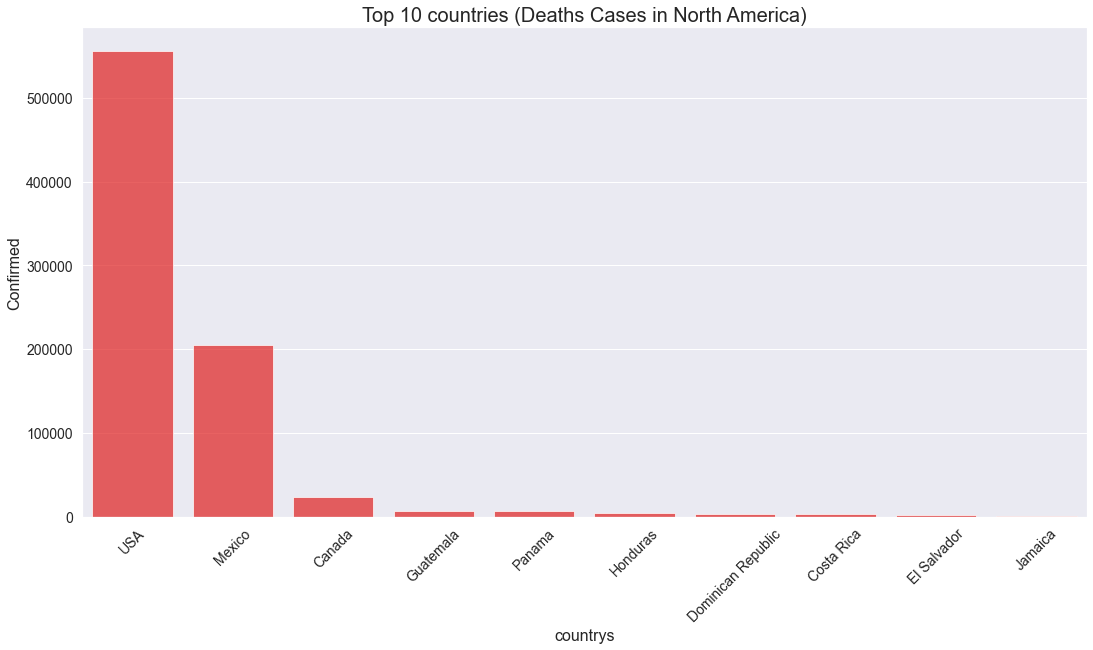

In [45]:
# Horizontal Bar plot
plt.figure(figsize=(18,9))

# sns.set(rc={"axes.facecolor":"#283747", "axes.grid":False,'xtick.labelsize':14,'ytick.labelsize':14})

sns.barplot(df_USA_Deaths['country'][:10], df_USA_Deaths['Deaths'][:10], color='red', alpha=.7)

plt.title("Top 10 countries (Deaths Cases in North America)" ,fontsize=20)

plt.xlabel('countrys',fontsize=16)
plt.ylabel('Confirmed',fontsize=16)
plt.xticks(fontsize=14,rotation= 45)
plt.yticks(fontsize=14)
plt.show()

In [36]:
df_egypt = df_confirmed[df_confirmed['country']=='Egypt'].drop(['country','state','continen','Lat','Long'],axis=1)
df_egypt = pd.DataFrame(index=df_egypt.columns, data=df_egypt.values[0])
df_egypt = df_egypt.reset_index()
df_egypt = df_egypt.rename(columns={'index':'date',0:'Confirmed'})

In [37]:
df_egypt_death = df_death[df_death['country']=='Egypt'].drop(['country','state','continen','Lat','Long'],axis=1)
df_egypt_death = pd.DataFrame(index=df_egypt_death.columns, data=df_egypt_death.values[0])
df_egypt_death = df_egypt_death.reset_index()
df_egypt_death = df_egypt_death.rename(columns={'index':'date',0:'Death'})

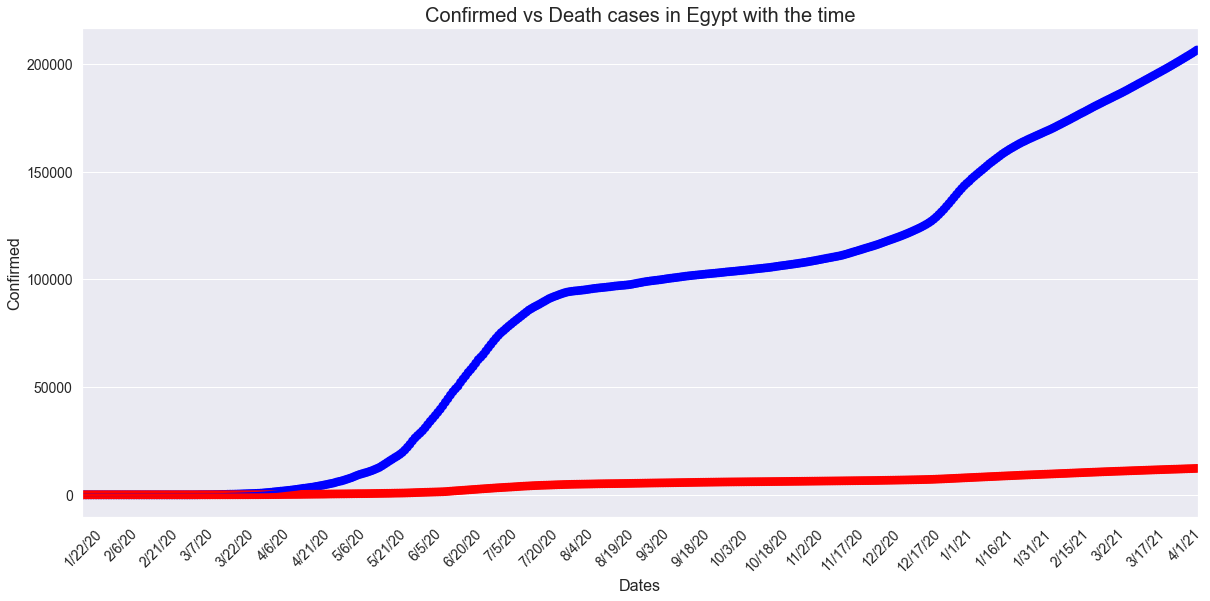

In [38]:
plt.figure(figsize=(20,9))

sns.pointplot(x='date',y='Confirmed',data=df_egypt,color='blue',alpha=0.8)
sns.pointplot(x='date',y='Death',data=df_egypt_death,color='red',alpha=0.8)
plt.title('Confirmed vs Death cases in Egypt with the time', fontsize=20)

plt.xlabel('Dates',fontsize=16)
plt.ylabel('Confirmed',fontsize=16)
plt.xticks(fontsize=14,rotation= 45 , ticks=range(0,441,15)  )
plt.yticks(fontsize=14)
plt.show()

In [39]:
df_USA = df_confirmed[df_confirmed['country']=='USA'].drop(['country','state','continen','Lat','Long'],axis=1).sum()
df_USA = pd.DataFrame(index=df_USA.index, data=df_USA.values)
df_USA = df_USA.reset_index()
df_USA = df_USA.rename(columns={'index':'date',0:'Confirmed'})

df_USA_death = df_death[df_death['country']=='USA'].drop(['country','state','continen','Lat','Long'],axis=1).sum()
df_USA_death = pd.DataFrame(index=df_USA_death.index, data=df_USA_death.values)
df_USA_death = df_USA_death.reset_index()
df_USA_death = df_USA_death.rename(columns={'index':'date',0:'Death'})


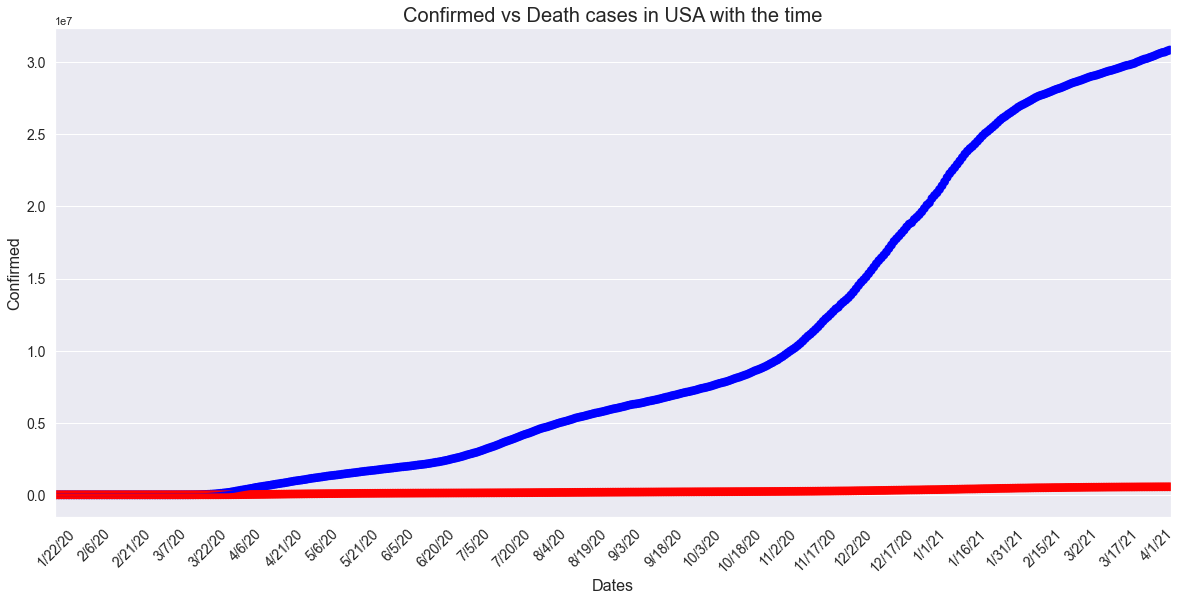

In [46]:
# sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})

plt.figure(figsize=(20,9))

sns.pointplot(x='date',y='Confirmed',data=df_USA,color='blue',alpha=0.8)
sns.pointplot(x='date',y='Death',data=df_USA_death,color='red',alpha=0.8)

plt.title('Confirmed vs Death cases in USA with the time', fontsize=20)

plt.xlabel('Dates',fontsize=16)
plt.ylabel('Confirmed',fontsize=16)
plt.xticks(fontsize=14,rotation= 45 , ticks=range(0,441,15)  )
plt.yticks(fontsize=14)
plt.show()

In [42]:
Mortality_Rate = df_country[['Mortality_Rate','country']].sort_values('Mortality_Rate',ascending=False)

In [52]:
Mortality_Rate[Mortality_Rate['country'] == 'USA']

Mortality_Rate country
48         1.825843     USA
178        1.804105     USA

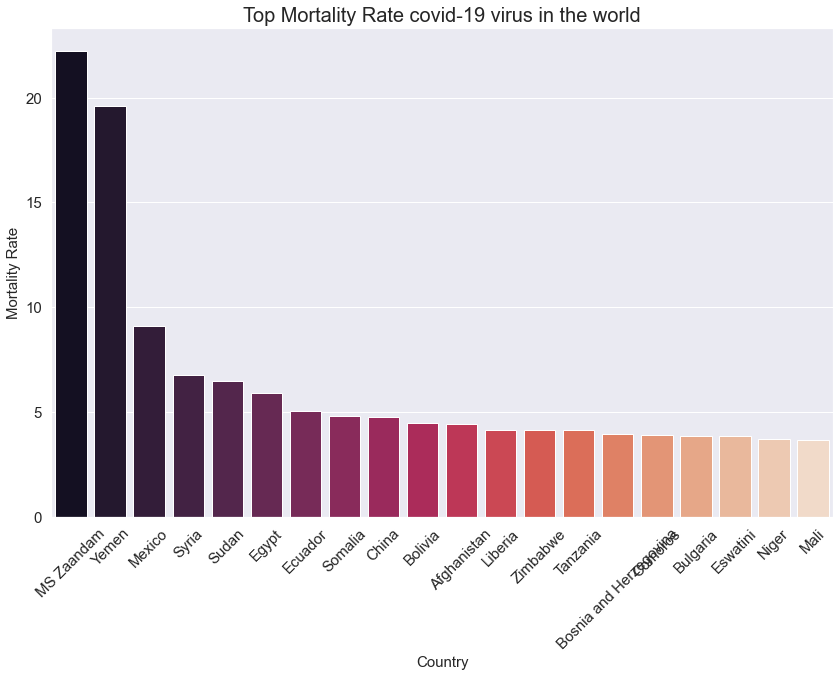

In [55]:
plt.figure(figsize=(14,9))

sns.barplot(Mortality_Rate['country'].iloc[:20], Mortality_Rate['Mortality_Rate'].iloc[:20], palette='rocket')

plt.title('Top Mortality Rate covid-19 virus in the world', fontsize=20)
plt.xlabel("Country",fontsize=15)
plt.ylabel("Mortality Rate",fontsize=15)
plt.xticks(rotation=45,fontsize=15)
plt.yticks(fontsize=15)
plt.show()

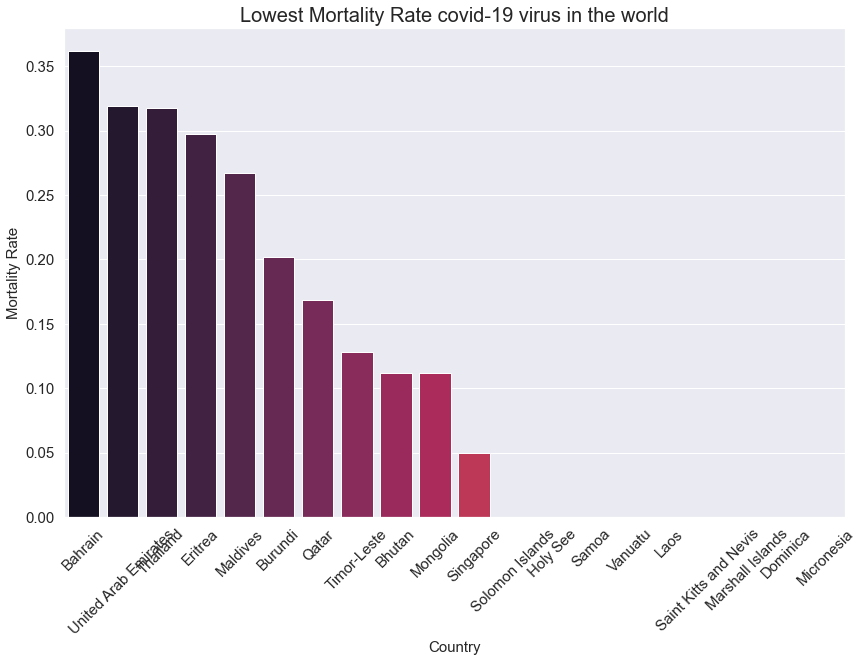

In [48]:
plt.figure(figsize=(14,9))

sns.barplot(Mortality_Rate['country'].iloc[-20:], Mortality_Rate['Mortality_Rate'].iloc[-20:], palette='rocket')

plt.title('Lowest Mortality Rate covid-19 virus in the world', fontsize=20)
plt.xlabel("Country",fontsize=15)
plt.ylabel("Mortality Rate",fontsize=15)
plt.xticks(rotation=45,fontsize=15)
plt.yticks(fontsize=15)
plt.show()

<hr>

# Thanks :)
**BY: Ahmed Fouad**